<a href="https://colab.research.google.com/github/jaaaamj0711/DACON/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%20%EC%82%AC%EC%9A%A9%EC%9E%90%20%EC%97%B0%EC%B2%B4%20%EC%98%88%EC%B8%A1%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

In [40]:
train = pd.read_csv("/content/drive/MyDrive/open/train.csv")
test = pd.read_csv("/content/drive/MyDrive/open/test.csv")

In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [7]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


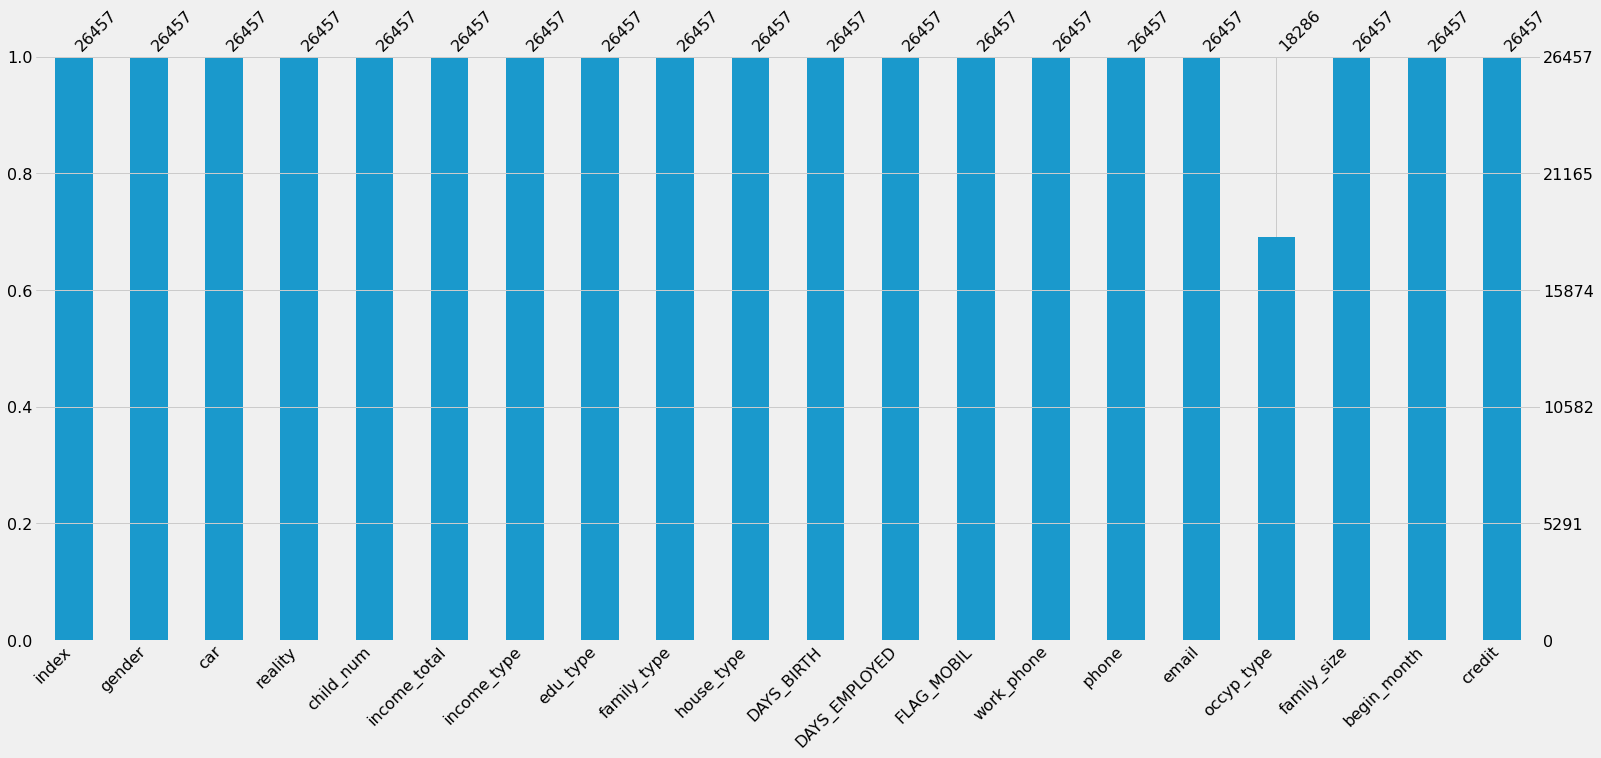

In [9]:
import missingno as msno
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [10]:
train = train.fillna({'occyp_type':'No job'})

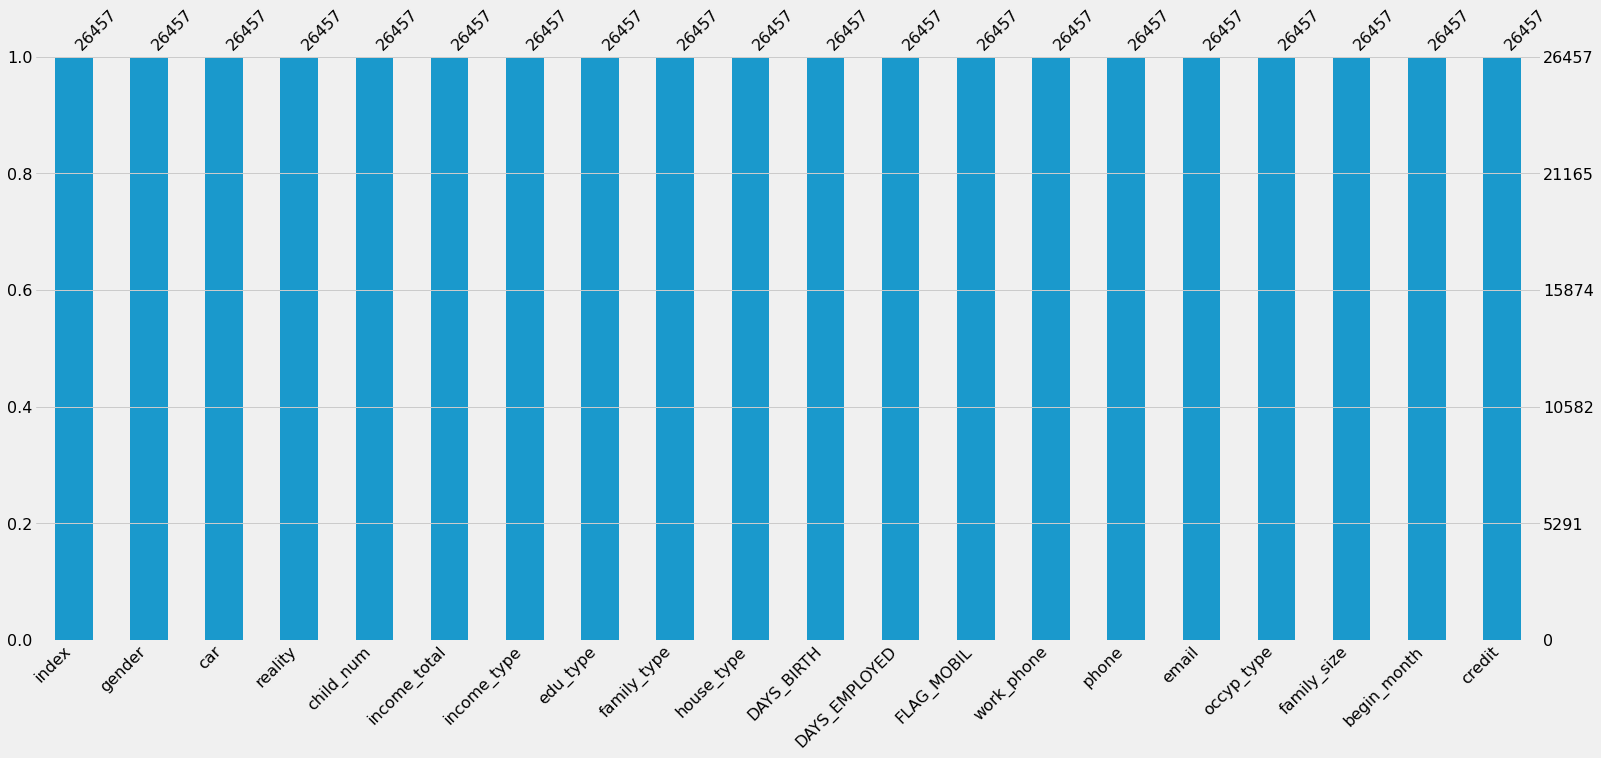

In [11]:
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [30]:
train[train['credit']==2.0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,26450,F,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10338,-581,1,0,1,0,Laborers,1.0,-37.0,2.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [43]:
pd.crosstab([train.gender,train.credit],train.car,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
credit이 높으면 신용도가 안좋은 것을 의미합니다!!

신용도가 좋지 않을수록(등급이 높을수록) 사람들이 차를 많이 소유하고 있을것이라고 생각했지만 그렇지 않았습니다.

- 먼저 여성의 경우는 별다른 차이가 없었습니다.
- 남성의 경우 신용도가 0.0, 2.0인 사람들중에서 차를 소유한 사람의 비율은 약 64%였습니다. 그리고 신용도가 1.0인 사람들중에서 차를 소유한 사람의 비율은 약 60%입니다.
- 중간신용등급을 가진 사람들이 가장 차를 덜 소유하고 있었습니다.

가설에서는 생각하지 못했던 부분도 발견했습니다.

- 여성은 신용등급에 크게 상관없이 차를 소유하고 있지 않은 사람의 비율의 더 높았습니다.
- 남성은 신용등급에 크게 상관없이 차를 소유한 사람들의 비율이 더 높았습니다.



In [35]:
pd.crosstab(train.gender, train.car, normalize= True)

car,N,Y
gender,,
F,0.495790,0.171719
M,0.119366,0.213125


In [15]:
a = train.groupby('gender')['car']
a

In [ ]:
낮을 수록 높은 신용의 신용카드 사용자를 의미함

	